In [9]:
import numpy as np
import os
from sklearn.cluster import KMeans
import json
import random
import networkx as nx

np.random.seed(1)
random.seed(1)

In [66]:
import numpy as np
import sys

class CIBR(object):
    def __init__(self, dataset, n_branches, depth):
        self.dataset = dataset
        self.n_branches = n_branches
        self.depth = depth
        self.tree = {}
        self.nodes = {}
        self.leaves = {}
        
        # private:
        self._current_index = 0
        
    def extract_features(self):
        # dummy features to test
        # replace with Antonio's 
        ones = np.ones(1)
        return np.array([ones, ones * 2, ones * 10, ones * 11])
        
    def create_tree(self, features=None, node=0, root=None, current_depth=0):
        if features is None:
            features = self.extract_features()
        if root is None:
            root = np.mean(features)
        
        self.nodes[node] = root
        
        # if `node` is a leaf node, return
        if current_depth >= self.depth or len(features) < self.n_branches:
            return
        
        # group features by cluster
        model = KMeans(n_clusters=self.n_branches)
        model.fit(features)
        children = [[] for i in range(self.n_branches)]
        for i in range(len(features)):
            children[model.labels_[i]].append(features[i])
        
        # cluster children
        self.tree[node] = []
        for i in range(self.n_branches):
            self._current_index += 1
            self.tree[node].append(self._current_index)
            self.create_tree(children[i], self._current_index, model.cluster_centers_[i], current_depth + 1, )
        return

    def create_index(self, image_path):
        points, features = self.extract_features(image_path)
        for feature in features:
            leaf = self._find_leaf_id(feature)
            if self._get_image_id(image_path) in self.leaves[leaf]:
                self.leaves[leaf][self._get_image_id(image_path)] += 1
            else:
                self.leaves[leaf][self._get_image_id(image_path)] = 1
        return

    def _get_image_id(self, image_path):
        return os.path.splitext(os.path.basename(image_path))[0]

    def _find_leaf_id(self, feature, root=0):
        """
        Returns the leaf of the tree closest to the input feature
        Args:
            feature (numpy.ndarray): The feature to lookup
            root (int): Node id to start the search from.
                        Default is 0, meaning the very root of the tree
        """
        min_dist = float("inf")
        node = None
        for child in self.tree[root]:
            distance = np.linalg.norm([self.nodes[child] - feature])
            if distance < min_dist:
                min_dist = distance
                node = child
        return node if len(self.tree[node]) == 0 else self._find_leafid(feature, node)

    def encode(self, image):
        """
        Returns the representation of a new image using the vocabulary tree
        Args:
            image (numpy.ndarray): image to encode
        Return:
            (numpy.ndarray): The encoded image
        """
        pass

    def scores(self, query):
        """
        Scores the current query image against the images in the database
        Args:
            query (numpy.ndarray): Query image
        Returns:
            (numpy.ndarray): 
        """
        pass

In [74]:
vv3 = CIBR(None, 2, 2)
vv3.create_tree()
print(vv3.tree)
print(vv3.nodes)

{0: [1, 4], 1: [2, 3], 4: [5, 6]}
{0: 6.0, 1: array([1.5]), 2: array([1.]), 3: array([2.]), 4: array([10.5]), 5: array([10.]), 6: array([11.])}


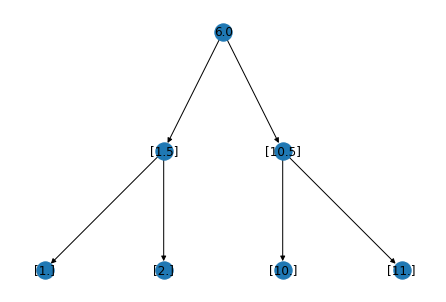

In [86]:
graph = nx.DiGraph()
for k, v in vv3.tree.items():
    graph.add_node(k)
    for link in v:
        graph.add_edge(k, link)

pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
nx.draw(graph, pos=pos, labels=vv3.nodes)

In [202]:
for node in vv3.nodes:
    try:
        print(vv3.nodes[node][0])
    except:
        pass

2.0
10.5
1.0


In [203]:
vv3.create_index()

TypeError: create_index() missing 1 required positional argument: 'image_path'